Gunakan data spam.csv untuk analisis! Kelas 1 merupakan email yang dianggap spam, kelas 0 merupakan email bukan spam.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/gdrive/MyDrive/MBKM Data Scientist/spam.csv')
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_titikcoma,char_freq_kurungbuka,char_freq_sikubuka,char_freq_tandaseru,char_freq_dolar,char_freq_pagar,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


<Axes: >

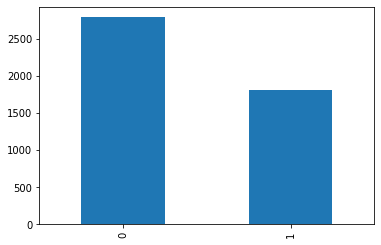

In [5]:
data['Class'].value_counts().plot.bar()

Bagaimana proporsi data tiap kelas?

In [6]:
print('Proportion of the classes in the data:')
print(data['Class'].value_counts() / len(data))

Proportion of the classes in the data:
0    0.605955
1    0.394045
Name: Class, dtype: float64


In [7]:
print('Proportion of the classes in the data:')
print(data['Class'].value_counts())

Proportion of the classes in the data:
0    2788
1    1813
Name: Class, dtype: int64


Apakah ditemukam missing value?

In [8]:
pd.isna(data).sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Bagaimana analisis regresi logistik dengan unbalance data?

*Penggunaan Imbalance data sering digunakan di kasus klasifikasi. ALgoritma sederhana pakai contoh Regresi logistik (untuk detail modelling akan di bahas di Pertemuan klasifikasi)

In [9]:
x = np.array(data.loc[:, data.columns != 'Class'])
y = np.array(data.loc[:, data.columns == 'Class']).reshape(-1, 1)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 3, shuffle = True, stratify = y)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

In [13]:
# fit the model
clf.fit(X_train, y_train.ravel())

# prediction for training dataset
train_pred = clf.predict(X_train)

# prediction for testing dataset
test_pred = clf.predict(X_test)

In [14]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.9266709928617781
Accuracy score for Testing Dataset =  0.9223173140223832


In [15]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1   All
True                       
0          1789    79  1868
1           147  1067  1214
All        1936  1146  3082


In [16]:
147/1214

0.12108731466227347

sebanyak 147 dari 1214 yang telah termasuk dalam kelas 1 diklasifikasikan sebagai kelas 0 yang merupakan bukan email spam.

Hasil mengklasifikasikan 12% email spam sebagai bukan spam.

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 3)

In [18]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

<Axes: >

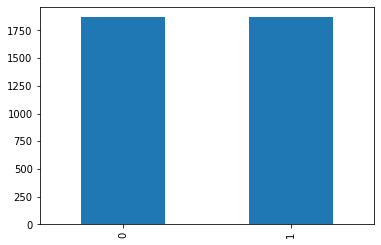

In [19]:
pd.Series(y_train_new).value_counts().plot.bar()

In [20]:
# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

Bagaimana hasilnya setelah unbalance data diatasi?

In [21]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.9274625267665952
Accuracy score for Testing Dataset =  0.9328505595786701


In [22]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1   All
True                       
0          1748   120  1868
1           151  1717  1868
All        1899  1837  3736


In [23]:
151/1868

0.08083511777301927

8 % dari email spam  telah diklasifikasikan sebagai bukan email spam